In [500]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


obj_df = pd.read_csv('objdbase.csv')
obj_df # The dataset

,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,Value9,Value10,Value11,Value12,Value13,Value14,Value15,Value16,Value17,Value18,Substance
0,247,516,447,726,8866,20429,1007,1349,17772,1155,2753,820,655,486,545,422,17348,5110,Cassava Flour
1,247,516,447,726,8864,20426,1006,1349,17776,1155,2755,820,655,486,545,422,17348,5110,Cassava Flour
2,247,516,447,726,8863,20425,1007,1349,17802,1156,2759,820,655,486,546,422,17349,5112,Cassava Flour
3,247,516,447,726,8861,20424,1007,1350,17825,1157,2762,821,656,486,546,422,17349,5113,Cassava Flour
4,247,516,447,726,8860,20420,1007,1349,17812,1156,2761,820,655,486,546,422,17348,5113,Cassava Flour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,133,236,177,293,3446,7078,459,534,17465,638,2073,339,375,288,388,331,5091,1332,3.5% Fat Milk
386,131,235,176,292,3441,7074,454,530,17100,630,2034,337,371,283,384,327,5090,1331,3.5% Fat Milk
387,131,235,176,292,3436,7068,451,528,16965,628,2019,336,369,282,382,324,5090,1331,3.5% Fat Milk
388,131,235,176,292,3431,7063,452,528,16934,628,2014,335,368,282,381,324,5090,1332,3.5% Fat Milk


In [501]:
print(obj_df.shape) # 390 rows and 19 columns

(390, 19)


In [502]:
unique_subs = list(obj_df.Substance.unique()) # The unique substances
print(unique_subs)

['Cassava Flour', 'Garri', 'Honey', 'Sunflower Oil', '4%-Fat Liquid Milk', 'White Onion', 'Table Salt', 'Yam Flour', 'Paracetamol', 'Fresh Tomato', 'Rapeseed Oil', 'Clipper Oil', '3.5% Fat Milk']


In [503]:
print(len(obj_df.Substance.unique())) # There are 13 different unique substances

13


In [504]:
print(obj_df['Substance'].value_counts()) # Each substance was scanned 30 times

Cassava Flour         30
Garri                 30
Honey                 30
Sunflower Oil         30
4%-Fat Liquid Milk    30
White Onion           30
Table Salt            30
Yam Flour             30
Paracetamol           30
Fresh Tomato          30
Rapeseed Oil          30
Clipper Oil           30
3.5% Fat Milk         30
Name: Substance, dtype: int64


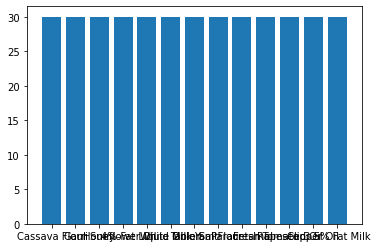

In [505]:
x_val = unique_subs
y_val = list(obj_df['Substance'].value_counts())
plt.bar(x_val, y_val)
#plt.xlabel('Substances')
#plt.ylabel('No of Scanns')
#plt.title('The Original Dataset')
plt.show()

In [506]:
# The values of the ddatasets only (without the column names)
obj_vals = obj_df.values
print(obj_vals)

[[247 516 447 ... 17348 5110 'Cassava Flour']
 [247 516 447 ... 17348 5110 'Cassava Flour']
 [247 516 447 ... 17349 5112 'Cassava Flour']
 ...
 [131 235 176 ... 5090 1331 '3.5% Fat Milk']
 [131 235 176 ... 5090 1332 '3.5% Fat Milk']
 [130 234 176 ... 5089 1331 '3.5% Fat Milk']]


In [507]:
def val_ave(df):
    '''
    This function performs element-wise addition and averaging of the numerical values of the datasets, substance-by-substance.
    At the end it produces a dataset of these values together with their corresponding substances.
    
    Params: Dataset of fingerprints (numerical values) with their corresponding substance labels. One important condition is
    that all the substances must be scanned for equal number of times.
    
    Returns: A list of lists of the averaged datasets, with their corresponding substance labels.
    '''
    vals_list = np.zeros(18)
    cnt = 0
    num_scan = len(df.values)/len(df.Substance.unique()) # Number of scans of eah substance
    vals_lists = []

    for subs in list(df.Substance.unique()):
        for vals in df.values:
            if vals[-1] == subs: # vals[-1] is the last element in the list which is the substance
                cnt += 1
                vals_list = np.add(vals_list, np.array(vals[:-1])) # Element-wise addition. vals[:-1] is a list of only the numerical values

            elif cnt == num_scan:
                break

        vals_list /= num_scan # Element-wise averaging
        vals_list = np.around(list(vals_list))
        vals_list = list(vals_list)
        vals_list.append(subs)
        vals_lists.append(vals_list)
        cnt = 0
        vals_list = np.zeros(18)
        
    return vals_lists
    
print(val_ave(obj_df))


[[246.0, 516.0, 446.0, 724.0, 8831.0, 20379.0, 1005.0, 1347.0, 17883.0, 1156.0, 2771.0, 820.0, 654.0, 483.0, 543.0, 420.0, 17330.0, 5114.0, 'Cassava Flour'], [186.0, 399.0, 350.0, 561.0, 7108.0, 15672.0, 570.0, 854.0, 6411.0, 630.0, 968.0, 513.0, 294.0, 222.0, 288.0, 230.0, 12735.0, 3737.0, 'Garri'], [70.0, 141.0, 101.0, 155.0, 1514.0, 3401.0, 189.0, 270.0, 1564.0, 261.0, 262.0, 157.0, 186.0, 255.0, 244.0, 163.0, 2468.0, 673.0, 'Honey'], [119.0, 221.0, 134.0, 190.0, 2010.0, 4044.0, 296.0, 363.0, 14339.0, 472.0, 1433.0, 247.0, 358.0, 347.0, 352.0, 257.0, 2901.0, 778.0, 'Sunflower Oil'], [141.0, 245.0, 187.0, 308.0, 3540.0, 7341.0, 534.0, 622.0, 25661.0, 702.0, 2956.0, 390.0, 544.0, 518.0, 575.0, 432.0, 5721.0, 1523.0, '4%-Fat Liquid Milk'], [116.0, 246.0, 213.0, 328.0, 3927.0, 8688.0, 321.0, 522.0, 761.0, 356.0, 271.0, 328.0, 159.0, 123.0, 156.0, 112.0, 8633.0, 2389.0, 'White Onion'], [197.0, 448.0, 366.0, 613.0, 7296.0, 16274.0, 1000.0, 1109.0, 45150.0, 1241.0, 7568.0, 794.0, 1889.0, 1